<a href="https://colab.research.google.com/github/WambuiN/DSCORE_IP_WEEK6/blob/main/Copy_of_Wambui_Njoroge_DSCore6_WEEK6_IP6_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the Question**

1. To predict whether a customer will close their bank account (1) or not (0).
2. We should also be able to pinpoint the factors that lead to Customer Churn in the Bank.

# **2.The Metric for Success**

1. The Metric for Success in our analysis will be to use polynomial and logistic models to effectively predict the results of matches.

# **3.The Context**

The FIFA World Ranking is a points-based system which takes into account all senior (or 'A') international matches played by a national team over the course of four years.

A team's total number of points is calculated by adding the average number of points gained during matches in the last 12 months to the average number of points gained from games older than 12 months (which depreciates year-on-year).

So at its most basic, FIFA ranking is determined by the following: 12 month average + previous 36 month average. 

# **4.The Experimental Design Taken**


Given the dataset at hand we will:
* Clean the data.
* Check for outliers and anomalies in  the dataset.
* Build the prediction models.
* Select the best model and use it to predict the outcome of footbal matches.

* We will evaluate the model performance.

* For this analysis we will build the following models:
  1. Polynomial
  2. Linear Regression

# **5.The Appropriateness of the Data to Answer the Given Question.**

1. Given the Objective at hand ie predicting customer churn then the data provided is appropriate for us to carry out our analysis.

# **1.Data Preprocessing**

Importing the Relevant Libraries

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#Loading the Results Dataset
results = pd.read_csv('results.csv')
results.shape

(40839, 9)

In [ ]:
# Previewing the top of our dataset
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Previewing the bottom of our dataset
results.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Checking whether each column has an appropriate datatype
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

The Results Dataset has 40839 rows and 9 columns. The dataset is uniform from the top to the bottom. The data types for each column are apporpriate

In [ ]:
#Loading the Ranking Dataset
ranking = pd.read_csv('fifa_ranking.csv')
ranking.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
ranking.shape

(57793, 16)

In [ ]:
# Previewing the top of our dataset
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# Previewing the top of our dataset
ranking.tail(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
# Checking whether each column has an appropriate datatype
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

The Ranking Dataset has 57793 rows and 16 columns. The dataset is uniform from the top to the bottom. The data types for each column are apporpriate

# Summary of the Datasets

In [ ]:
# Checking summary of the dataset
ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
# Checking summary of the dataset
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
#Converting the date column to type datetime

import datetime
results['date'] = pd.to_datetime(results['date'])
#
# splitting the datetime column into month and year
results['Year'], results['Month'] = results['date'].dt.year, results['date'].dt.month

In [ ]:
# splitting the datetime column into month and year
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
ranking['Year'], ranking['Month'] = ranking['rank_date'].dt.year, ranking['rank_date'].dt.month


Merge the Datasets 

In [ ]:
final_data = pd.merge(ranking, results, how = 'left' , left_on =['Year', 'Month'],right_on = ['Year', 'Month'])
final_data

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,Year,Month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293982,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True
4293983,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True
4293984,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True
4293985,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True


# **Final Data Preprocessing**

In [ ]:
final_data.shape

(4293987, 27)

In [ ]:
# Previewing the top of our dataset
final_data.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,Year,Month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True


In [ ]:
# Previewing the bottom of our dataset
final_data.tail(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,Year,Month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
4293982,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True
4293983,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True
4293984,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True
4293985,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True
4293986,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018,6,2018-06-30,Uruguay,Portugal,2,1,FIFA World Cup,Sochi,Russia,True


In [ ]:
# Checking whether each column has an appropriate datatype
final_data.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
Year                                int64
Month                               int64
date                       datetime64[ns]
home_team                          object
away_team                          object
home_score                          int64
away_score                          int64
tournament                        

## **1.2.Data Cleaning**

In [ ]:
#Checking for null values
final_data.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
Year                       0
Month                      0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

In [ ]:
#Checking out for Duplicates
final_data.duplicated().sum()

2879

In [ ]:
#Dropping the duplicated records in the final dataset

final_data.drop_duplicates(keep='first', inplace = True)

In [ ]:
#Confirmation of dropped duplicate records
final_data.duplicated().sum()

0

In [ ]:
final_data.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'Year',
       'Month', 'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:

#creating new dataset with relevant columns

final_data1 = final_data[['rank','country_full','home_team','away_team','home_score','away_score','tournament','Month','Year']]
final_data1

,rank,country_full,home_team,away_team,home_score,away_score,tournament,Month,Year
0,1,Germany,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993
1,1,Germany,Peru,Argentina,0,1,FIFA World Cup qualification,8,1993
2,1,Germany,Uruguay,Ecuador,0,0,FIFA World Cup qualification,8,1993
3,1,Germany,Venezuela,Brazil,1,5,FIFA World Cup qualification,8,1993
4,1,Germany,Senegal,Zambia,0,0,FIFA World Cup qualification,8,1993
...,...,...,...,...,...,...,...,...,...
4293982,206,Tonga,Senegal,Colombia,0,1,FIFA World Cup,6,2018
4293983,206,Tonga,Panama,Tunisia,1,2,FIFA World Cup,6,2018
4293984,206,Tonga,England,Belgium,0,1,FIFA World Cup,6,2018
4293985,206,Tonga,France,Argentina,4,3,FIFA World Cup,6,2018


In [ ]:
#Standardizing the table column names
final_data1.columns = final_data1.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
final_data1.columns
final_data1.head(3)

,RANK,COUNTRY_FULL,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,MONTH,YEAR
0,1,Germany,Colombia,Paraguay,0,0,FIFA World Cup qualification,8,1993
1,1,Germany,Peru,Argentina,0,1,FIFA World Cup qualification,8,1993
2,1,Germany,Uruguay,Ecuador,0,0,FIFA World Cup qualification,8,1993


In [ ]:
# Encode labels in column 'TOURNAMENT'. 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final_data1['TOURNAMENT'] = le.fit_transform(final_data1['TOURNAMENT'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
final_data1['TOURNAMENT'].unique() 

array([29, 31,  7,  9, 66, 42, 41, 13,  6, 12, 62, 39, 28, 51, 10, 34, 56,
       11, 25, 38, 54, 20, 40, 65, 18, 36, 43, 57, 63, 50, 70, 32,  2,  5,
        1, 37, 22, 24, 46, 16, 58, 33, 17, 55, 59, 64, 48, 69, 61, 44, 53,
       26,  3, 30, 21, 27, 68, 60,  4,  8, 67, 23,  0, 47, 45, 52, 49, 15,
       14, 19, 71, 35])

Function for generating a win, loss or draw for the final dataset

In [ ]:
#creating a function 
#
def get_status(row):
  if (row["HOME_SCORE"] > row["AWAY_SCORE"]):
    return "WIN"
  elif (row["HOME_SCORE"] == row["AWAY_SCORE"]):
    return "DRAW"
  else :
    return "LOSS"

In [ ]:
#Apply function to final dataset
final_data1["STATUS"] =final_data1.apply(lambda x:get_status(x), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
final_data1.head(5)

,RANK,COUNTRY_FULL,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,MONTH,YEAR,STATUS
0,1,Germany,Colombia,Paraguay,0,0,29,8,1993,DRAW
1,1,Germany,Peru,Argentina,0,1,29,8,1993,LOSS
2,1,Germany,Uruguay,Ecuador,0,0,29,8,1993,DRAW
3,1,Germany,Venezuela,Brazil,1,5,29,8,1993,LOSS
4,1,Germany,Senegal,Zambia,0,0,29,8,1993,DRAW


In [ ]:
# Encode labels in column 'STATIS'. 


le = LabelEncoder()
final_data1['STATUS'] = le.fit_transform(final_data1['STATUS'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
final_data1.head(5)

,RANK,COUNTRY_FULL,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,MONTH,YEAR,STATUS
0,1,Germany,Colombia,Paraguay,0,0,29,8,1993,0
1,1,Germany,Peru,Argentina,0,1,29,8,1993,1
2,1,Germany,Uruguay,Ecuador,0,0,29,8,1993,0
3,1,Germany,Venezuela,Brazil,1,5,29,8,1993,1
4,1,Germany,Senegal,Zambia,0,0,29,8,1993,0


# **2.Exploratory Data Analysis.**

## **2.1.Univariate Data Analyisis**

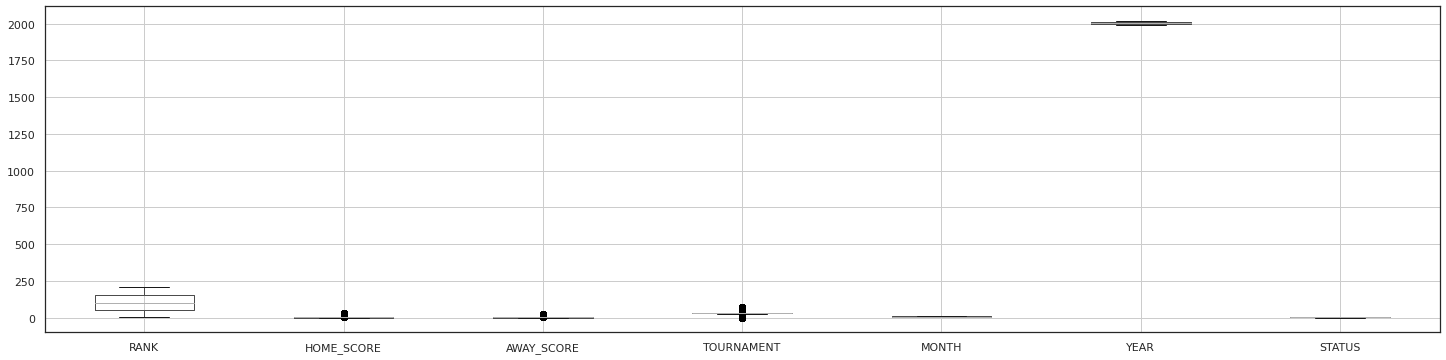

In [ ]:
# Checking for Outliers

final_data2 = final_data1
plt.figure(figsize = (25, 6))
final_data2.boxplot()
plt.show()

The dataset has a lot of outliers. However, we cannot remove them because they real actual results and therefore provide useful insights.

## **2.2.Bivariate Data Analyisis**

In [ ]:
final_data1.head(3)

,RANK,COUNTRY_FULL,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,MONTH,YEAR,STATUS
0,1,Germany,Colombia,Paraguay,0,0,29,8,1993,0
1,1,Germany,Peru,Argentina,0,1,29,8,1993,1
2,1,Germany,Uruguay,Ecuador,0,0,29,8,1993,0


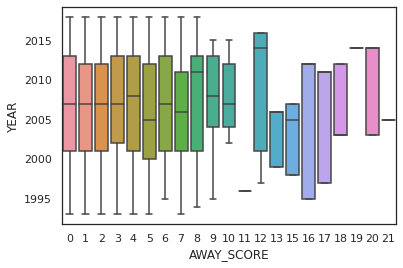

In [ ]:
#Distribution of away scores 

sns.boxplot(x="AWAY_SCORE", y="YEAR", data=final_data1)

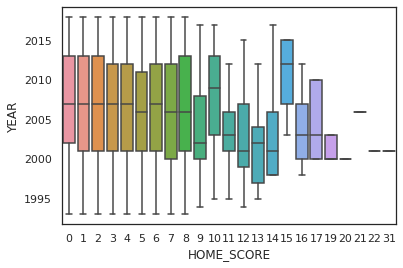

In [ ]:
#Distribution of home scores 

sns.boxplot(x="HOME_SCORE", y="YEAR", data=final_data1)

Checking for Multicollinearity

Text(0.5, 1.0, 'Multi-Collinearity of the Variables')

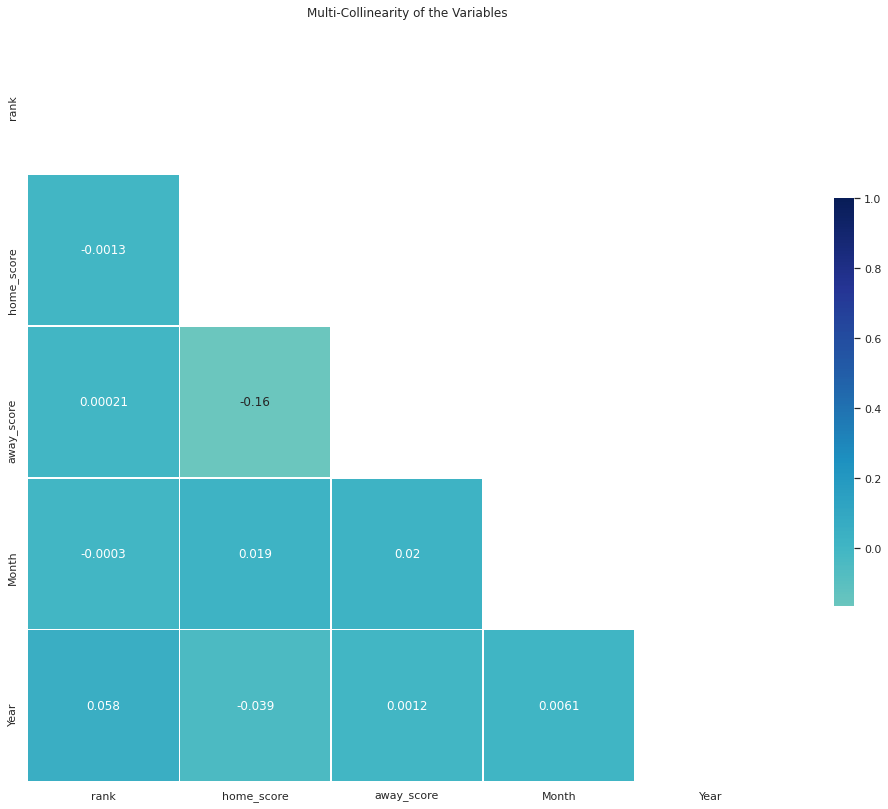

In [ ]:
#heat map for correlation purposes
sns.set(style="white")
# Create a covariance matrix
corr = final_data1.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17,15))
# Generate a custom diverging colormap
cmap = "YlGnBu"
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, annot = True,
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of the Variables')

From the heatmap:

We can see there is a low positive correlation between rank and year (Exited).

We can also see that home_score and theyear are the least correlated variables in our dataset with a correlation of -0.039.



# **3.Classification Models.**

In [ ]:
final_data1.head(5)

,RANK,COUNTRY_FULL,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,MONTH,YEAR,STATUS
0,1,Germany,Colombia,Paraguay,0,0,29,8,1993,0
1,1,Germany,Peru,Argentina,0,1,29,8,1993,1
2,1,Germany,Uruguay,Ecuador,0,0,29,8,1993,0
3,1,Germany,Venezuela,Brazil,1,5,29,8,1993,1
4,1,Germany,Senegal,Zambia,0,0,29,8,1993,0


## **3.1.Polynomial Regression**

Model 1: Predict how many goals the home team scores.

In [ ]:
#Loading the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from sklearn import metrics

In [ ]:
X = final_data1[['RANK','TOURNAMENT']]
y = final_data1['HOME_SCORE']

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

#fit a polynomial regression
poly = PolynomialFeatures(degree = 6)
poly.fit_transform(X_train)

#training our model
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

#making predictions
y_pred = poly_reg.predict(X_test)
y_pred

array([1.65021464, 1.60412618, 1.68688087, ..., 1.66980532, 1.67414327,
       1.6458322 ])

Model 2: Predict how many goals the away team scores.

In [ ]:
X = final_data1[['RANK','TOURNAMENT']]
y = final_data1['AWAY_SCORE']

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

#fit a polynomial regression
poly = PolynomialFeatures(degree = 6)
poly.fit_transform(X_train)

#training our model
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

#making predictions
y_pred = poly_reg.predict(X_test)
y_pred

array([1.10598819, 1.17838301, 1.0407334 , ..., 1.07002976, 1.06107889,
       1.10629145])

In [ ]:
#using rmse to measure the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9360572314591807
Mean Squared Error: 1.8307959176520672
Root Mean Squared Error: 1.3530690734962747


## **3.2.Logistic Regression**

Model 1: Predict how many goals the home team scores.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Splitting our dataset
#
X = final_data1[['RANK','TOURNAMENT']]
y = final_data1['HOME_SCORE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
y_pred = LogReg.predict(X_test)

# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[     0, 330965,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0, 384404,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0, 287196,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0, 142145,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,  72525,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,     

Model 2: Predict how many goals the home team scores.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Splitting our dataset
#
X = final_data1[['RANK','TOURNAMENT']]
y = final_data1['AWAY_SCORE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
y_pred = LogReg.predict(X_test)

# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[508369,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0],
       [414952,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0],
       [217947,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0],
       [ 85222,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0],
       [ 32844,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0],
       [ 12606,      0,      0,    

In [ ]:
# Evaluating the model performance

print('------------------------------------------------------')
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print('------------------------------------------------------')



------------------------------------------------------
Accuracy Score: 0.3949009308391846
------------------------------------------------------


Comparing the two models, the logistic regression model after tuning perfomed better.